In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import matplotlib.patches as pat
from matplotlib.ticker import AutoMinorLocator

# Set ipython's max row display
pd.set_option('display.max_row', 15)

# Set iPython's max column width
pd.set_option('display.max_columns', 10)

In [2]:
def hex_reflections(ind,lat):
    h=ind[0]
    k=ind[1]
    l=ind[2]
    a=lat[0]
    b=lat[1]
    c=lat[2]
    return (np.sqrt((h/a)**2+(h*k/(a*b))+(k/b)**2+(l/c)**2),h,k,l)

def cubic_reflections(ind,lat):
    h=ind[0]
    k=ind[1]
    l=ind[2]
    a=lat[0]
    b=lat[1]
    c=lat[2]
    return (2/np.sqrt(3))*(np.sqrt((h/a)**2+(k/b)**2+(l/c)**2),h,k,l)

def isBCC(row):
    if (row['h'] + row['k'] + row['l'])%2==0:
        return True
    else:
        return False
    
def isFCC(row):
    if row['h']%2==0 and row['k']%2==0 and row['l']%2==0:
        return True
    elif row['h']%2!=0 and row['k']%2!=0 and row['l']%2!=0:
        return True
    else:
        return False

def isDC(row):
    if row['h']==0 and row['k']==0 and row['l']==0:
        return True
    elif row['h']%2!=0 and row['k']%2!=0 and row['l']%2!=0:
        return True
    elif (row['h']%2==0 and row['k']%2==0 and row['l']%2==0) and ((row['h'] + row['k'] + row['l'] -2)/2)%2==0:
        return True
    else:
        return False

In [3]:
#user inputs

hmax=5
latticea=1
latticeb=1
latticec=1

In [4]:
#cubic
norm=max([latticea,latticeb,latticec])
latticea/=norm
latticeb/=norm
latticec/=norm
indices = [p for p in it.product(np.arange(-hmax,hmax+1,1), repeat=3)]
dtype=[('radii',float),('h',int),('k',int),("l",int)]
allreflect=np.array([cubic_reflections(x,[latticea,latticeb,latticec]) for x in indices],dtype=dtype)
df=pd.DataFrame(allreflect)
df=df.sort_values(['radii',"h","k","l"],ascending=[True,False,False,False])
df=df.reset_index(drop=True)
df["isSC"] = True
df["isBCC"] = df.apply(isBCC,axis=1)
df["isFCC"] = df.apply(isFCC,axis=1)
df["isDC"] = df.apply(isDC,axis=1)
SC=df.loc[:,["radii","h","k","l","isSC"]]
SC=SC[SC["isSC"]]
SC=SC.reset_index(drop=True)
BCC=df.loc[:,["radii","h","k","l","isBCC"]]
BCC=BCC[BCC["isBCC"]] #?????
BCC=BCC.reset_index(drop=True)
FCC=df.loc[:,["radii","h","k","l","isFCC"]]
FCC=FCC[FCC["isFCC"]]
FCC=FCC.reset_index(drop=True)
DC=df.loc[:,["radii","h","k","l","isDC"]]
DC=DC[DC["isDC"]]
DC=DC.reset_index(drop=True)

/Users/MF/anaconda/envs/hyperspy_new/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
FCC=FCC.drop_duplicates(['radii'])
FCC=FCC.reset_index(drop=True)
FCC[["radii","h","k","l"]]

BCC=BCC.drop_duplicates(['radii'])
BCC=BCC.reset_index(drop=True)
BCC[["radii","h","k","l"]]

DC=DC.drop_duplicates(['radii'])
DC=DC.reset_index(drop=True)
BCC[["radii","h","k","l"]]

,radii,h,k,l
0,0.000000,0,0,0
1,1.414214,1,1,0
2,2.000000,2,0,0
3,2.449490,2,1,1
4,2.828427,2,2,0
5,3.162278,3,1,0
6,3.464102,2,2,2
...,...,...,...,...
17,6.000000,4,4,2
18,6.164414,5,3,2


In [3]:
#user inputs

hmax=5
latticea=2.5
latticeb=2.5
latticec=6.6

In [4]:
#hexagonal
norm=max([latticea,latticeb,latticec])
latticea/=norm
latticeb/=norm
latticec/=norm
indices = [p for p in it.product(np.arange(-hmax,hmax+1,1), repeat=3)]
dtype=[('radii',float),('h',int),('k',int),("l",int)]
allreflect=np.array([hex_reflections(x,[latticea,latticeb,latticec]) for x in indices],dtype=dtype)
df=pd.DataFrame(allreflect)
df=df.sort_values(['radii',"h","k","l"],ascending=[True,False,False,False])
df=df.reset_index(drop=True)
df

HEX=df.drop_duplicates(['radii'])
HEX=HEX.reset_index(drop=True)
HEX

,radii,h,k,l
0,0.000000,0,0,0
1,1.000000,0,0,1
2,2.000000,0,0,2
3,2.640000,1,0,0
4,2.823048,1,0,1
5,3.000000,0,0,3
6,3.312039,1,0,2
...,...,...,...,...
153,21.216635,4,5,5
154,22.863071,5,5,0


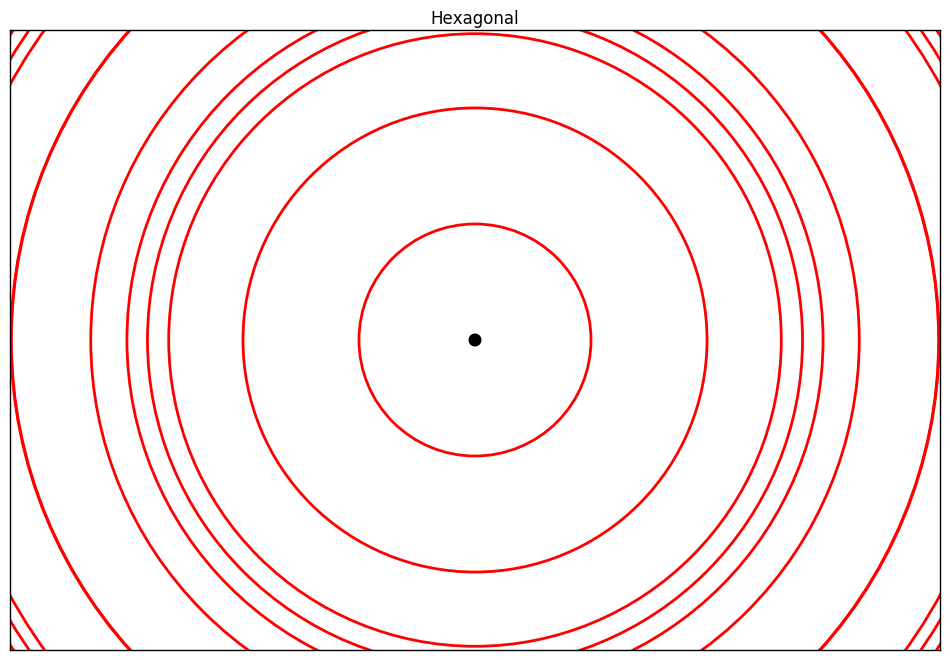

In [5]:
sx=4008
sy=2672
c=(sx/2,sy/2)
scale=500

fig,ax = plt.subplots(1,figsize=(12,8))
ax.set_aspect('equal')

circ = pat.Circle(c,scale*.05,facecolor="k",edgecolor='k')
ax.add_patch(circ)

rads=np.array(HEX["radii"])[1:]
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='r',linewidth=2)
    ax.add_patch(circ)

plt.title("Hexagonal")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

plt.axis([0,sx,0,sy])
plt.show()

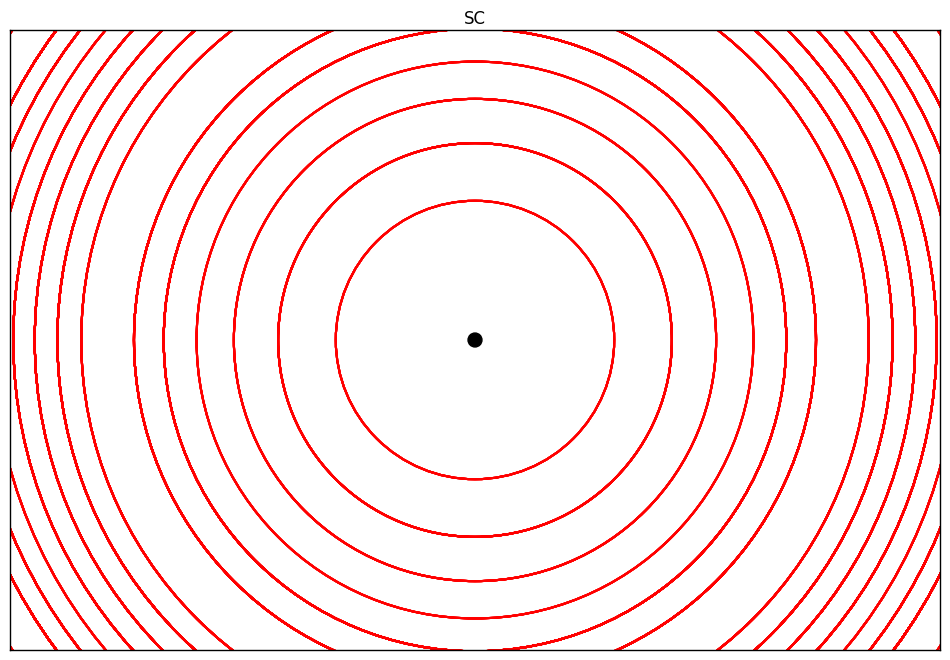

In [46]:
sx=4008
sy=2672
c=(sx/2,sy/2)
scale=600

fig,ax = plt.subplots(1,figsize=(12,8))
ax.set_aspect('equal')

circ = pat.Circle(c,scale*.05,facecolor="k",edgecolor='k')
ax.add_patch(circ)

rads=np.array(SC["radii"])[1:]
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='k',linewidth=1.0)
    ax.add_patch(circ)

plt.title("SC")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

plt.axis([0,sx,0,sy])
plt.show()

In [60]:
np.array(FCC["radii"])[1:].min()

1.7320508075688772

In [59]:
np.array(FCC["radii"])[1:]/(np.array(FCC["radii"])[1:].min())

array([ 1.        ,  1.15470054,  1.63299316,  1.91485422,  2.        ,
        2.30940108,  2.51661148,  2.5819889 ,  2.82842712,  3.        ,
        3.26598632,  3.41565026,  3.46410162,  3.7859389 ,  4.        ,
        4.12310563,  4.43471157,  5.        ])

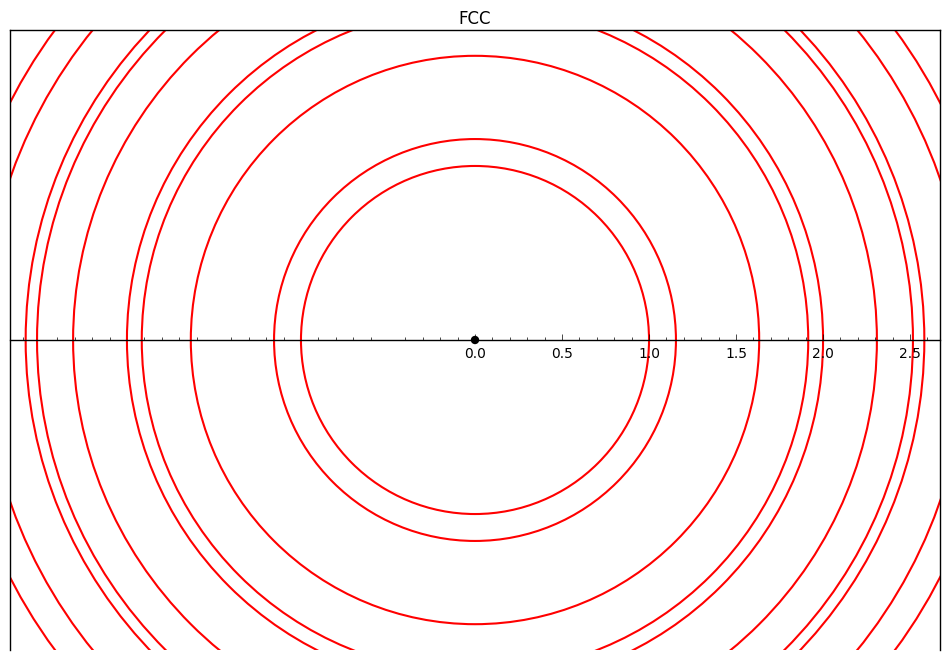

In [127]:
sx=4008
sy=2672
c=(sx/2,sy/2)
scale=750

fig,ax = plt.subplots(1,figsize=(12,10))
ax.set_aspect('equal')

circ = pat.Circle(c,scale*.02,facecolor="k",edgecolor='k')
ax.add_patch(circ)

rads=np.array(FCC["radii"])[1:]/(np.array(FCC["radii"])[1:].min())
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='r',linewidth=1.5)
    ax.add_patch(circ)

plt.title("FCC")
#ax.axes.get_xaxis().set_ticks([])

ax.xaxis.set_ticks_position('bottom')

#ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.axes.get_yaxis().set_ticks([])

div =0.5

xticks=np.arange(sx/2,sx,div*scale)

ax.axes.get_xaxis().set_ticks(xticks)

xlabels = np.arange(0,sx/2/scale,div)

ax.axes.set_xticklabels(xlabels)

minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)


plt.axis([0,sx,0,sy])
plt.show()
fig.savefig("FCC.png", bbox_inches='tight')

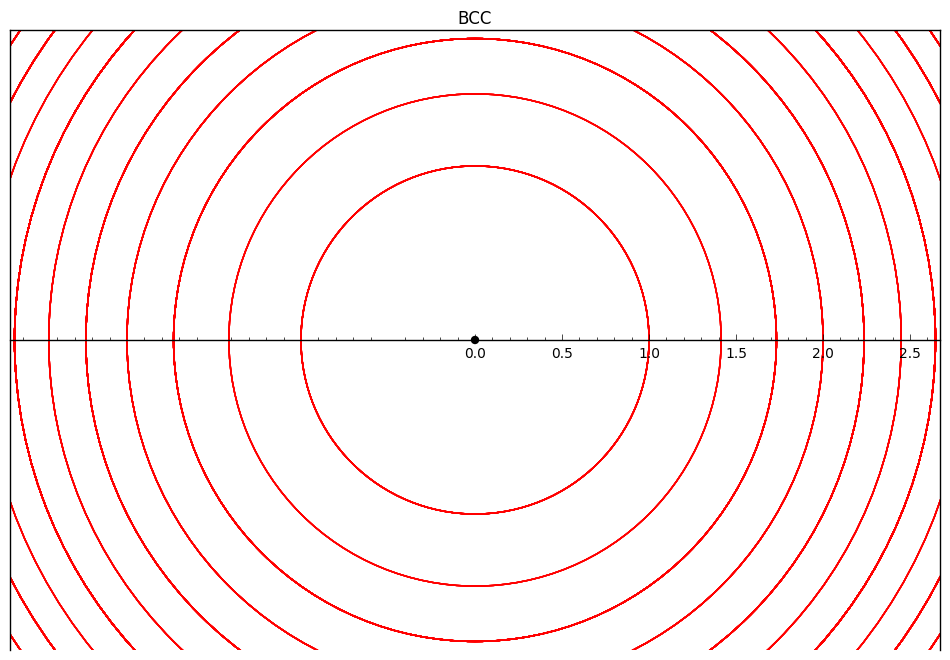

In [126]:
sx=4008
sy=2672
c=(sx/2,sy/2)
scale=750

fig,ax = plt.subplots(1,figsize=(12,10))
ax.set_aspect('equal')

circ = pat.Circle(c,scale*.02,facecolor="k",edgecolor='k')
ax.add_patch(circ)

rads=np.array(BCC["radii"])[1:]/(np.array(BCC["radii"])[1:].min())
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='r',linewidth=1.0)
    ax.add_patch(circ)

plt.title("BCC")
#ax.axes.get_xaxis().set_ticks([])

ax.xaxis.set_ticks_position('bottom')

#ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.axes.get_yaxis().set_ticks([])

div =0.5

xticks=np.arange(sx/2,sx,div*scale)

ax.axes.get_xaxis().set_ticks(xticks)

xlabels = np.arange(0,sx/2/scale,div)

ax.axes.set_xticklabels(xlabels)

minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)


plt.axis([0,sx,0,sy])
plt.show()
fig.savefig("BCC.png", bbox_inches='tight')

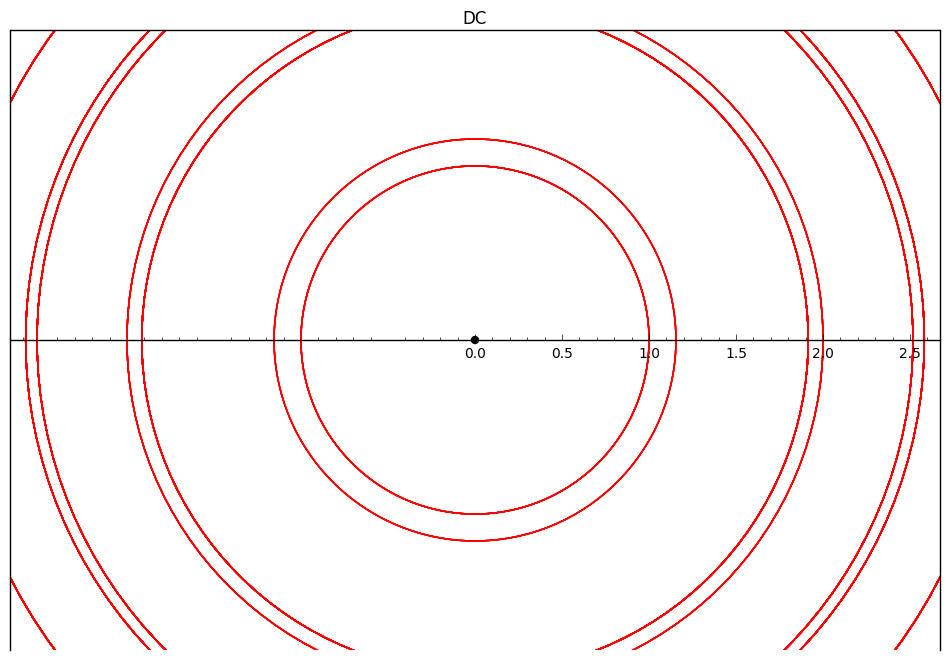

In [128]:
sx=4008
sy=2672
c=(sx/2,sy/2)
scale=750

fig,ax = plt.subplots(1,figsize=(12,10))
ax.set_aspect('equal')

circ = pat.Circle(c,scale*.02,facecolor="k",edgecolor='k')
ax.add_patch(circ)

rads=np.array(DC["radii"])[1:]/(np.array(DC["radii"])[1:].min())
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='r',linewidth=1.0)
    ax.add_patch(circ)

plt.title("DC")
#ax.axes.get_xaxis().set_ticks([])

ax.xaxis.set_ticks_position('bottom')

#ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.axes.get_yaxis().set_ticks([])

div =0.5

xticks=np.arange(sx/2,sx,div*scale)

ax.axes.get_xaxis().set_ticks(xticks)

xlabels = np.arange(0,sx/2/scale,div)

ax.axes.set_xticklabels(xlabels)

minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)


plt.axis([0,sx,0,sy])
plt.show()
fig.savefig("DC.png", bbox_inches='tight')

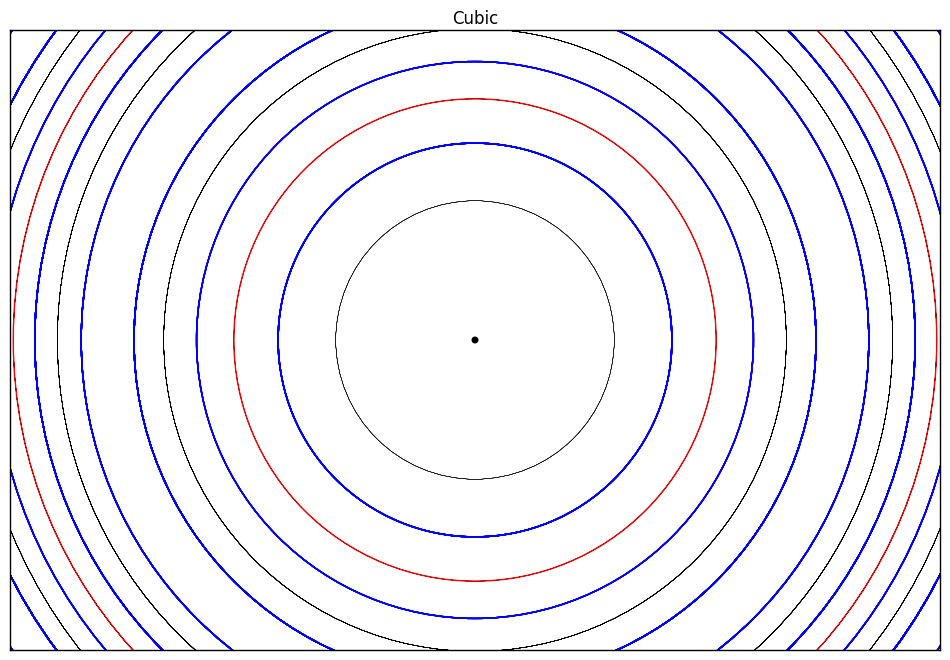

In [56]:
sx=4008
sy=2672
c=(sx/2,sy/2)
scale=600

fig,ax = plt.subplots(1,figsize=(12,8))
ax.set_aspect('equal')

circ = pat.Circle(c,scale*.02,facecolor="k",edgecolor='k')
ax.add_patch(circ)

rads=np.array(SC["radii"])[1:]
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='k',linewidth=0.2)
    ax.add_patch(circ)
    
rads=np.array(FCC["radii"])[1:]
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='r',linewidth=1.0)
    ax.add_patch(circ)
    
rads=np.array(BCC["radii"])[1:]
for x in rads:
    circ = pat.Circle(c,scale*x,facecolor="none",edgecolor='b',linewidth=1.0)
    ax.add_patch(circ)

plt.title("Cubic")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

plt.axis([0,sx,0,sy])
plt.show()

In [133]:
BCC

,radii,h,k,l,isBCC
0,0.000000,0,0,0,True
1,1.414214,1,1,0,True
2,1.414214,1,0,1,True
3,1.414214,1,0,-1,True
4,1.414214,1,-1,0,True
5,1.414214,0,1,1,True
6,1.414214,0,1,-1,True
...,...,...,...,...,...
658,8.124038,-5,5,-4,True
659,8.124038,-5,4,5,True
